In [ ]:



pip install torchaudio

SyntaxError: invalid syntax (4291931869.py, line 1)

In [3]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install torchvision

  Using cached torchvision-0.21.0-cp312-cp312-manylinux1_x86_64.whl.metadata (6.1 kB)
Using cached torchvision-0.21.0-cp312-cp312-manylinux1_x86_64.whl (7.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install torch-geometric

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib networkx

Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd

# Simulamos embeddings de párrafos normativos
node_features = torch.tensor([
    [0.8, 0.1, 0.1],  # párrafo 0
    [0.7, 0.2, 0.1],  # párrafo 1
    [0.2, 0.7, 0.1],  # párrafo 2
    [0.1, 0.1, 0.8],  # párrafo 3
    [0.2, 0.2, 0.6],  # párrafo 4
], dtype=torch.float)

# Relaciones semánticas o referencias cruzadas
edge_index = torch.tensor([
    [0, 1, 1, 2, 3, 3, 4],  # de
    [1, 0, 2, 1, 4, 2, 3]   # a
], dtype=torch.long)

graph_data = Data(x=node_features, edge_index=edge_index)

# Modelo GCN simple
class GCNClassifier(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.softmax(x, dim=1)

# Ejecutamos una inferencia
model = GCNClassifier(3, 4, 2)
output = model(graph_data)

# Mostramos el resultado
output_df = pd.DataFrame(output.detach().numpy(), columns=["Clase 0", "Clase 1"])
output_df.index.name = "Nodo (Párrafo)"
print(output_df)



                 Clase 0   Clase 1
Nodo (Párrafo)                    
0               0.445318  0.554682
1               0.441222  0.558778
2               0.450838  0.549162
3               0.452925  0.547075
4               0.452925  0.547075


/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


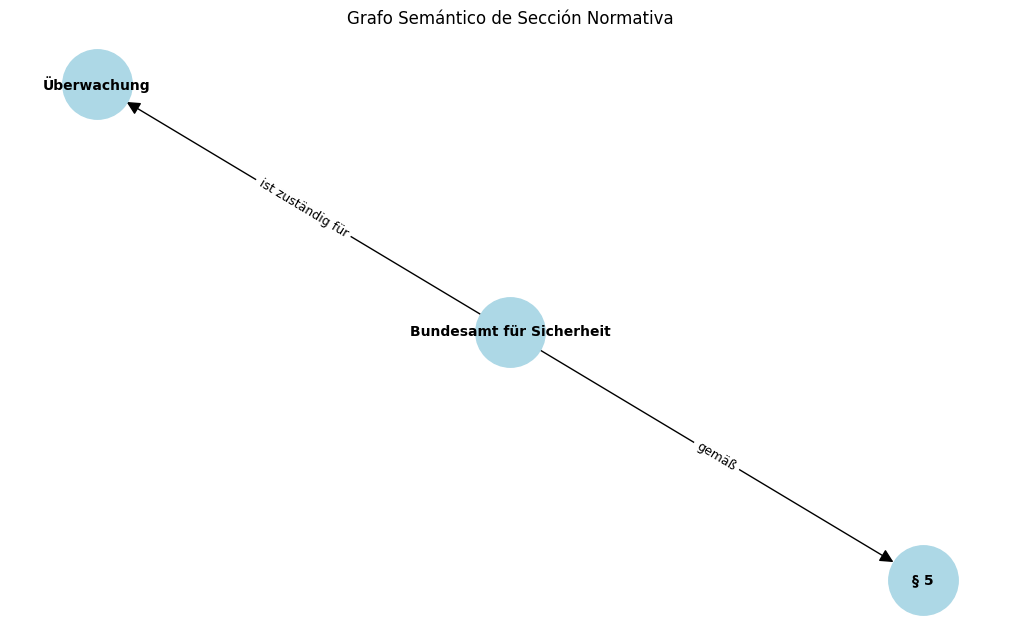

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


Shape of the embedding matrix: (3, 768)


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Texto completo,0.000652,-0.030857,0.023471,0.055541,0.010243,0.005219,0.064784,0.002244,0.049487,0.009477,...,-0.086254,0.007624,-0.062807,0.007815,0.026351,0.003623,-0.023658,-0.020550,-0.036380,-0.010016
Bundesamt für Sicherheit,-0.000069,-0.025967,0.005064,0.058891,-0.042870,0.034488,0.034088,-0.009528,0.027698,0.007370,...,-0.091928,-0.006689,-0.046081,0.025441,0.006618,-0.079206,-0.016370,-0.032642,-0.005523,0.003495
§ 5,0.017331,-0.005808,-0.006314,0.026529,-0.021702,0.008126,0.025035,-0.003559,0.040612,0.014208,...,-0.114364,0.005963,-0.010076,0.010161,-0.004647,-0.039465,-0.031450,-0.036428,-0.022772,-0.017666


In [3]:
from sentence_transformers import SentenceTransformer
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Simulación de una sección normativa
example_section = {
    "article": "§ 5",
    "title": "Zuständigkeit",
    "text": "Das Bundesamt für Sicherheit ist gemäß § 5 für die Überwachung verantwortlich.",
    "entities": [
        {"label": "Organisation", "text": "Bundesamt für Sicherheit"},
        {"label": "Paragraph", "text": "§ 5"}
    ],
    "references": ["§ 5"]
}

# Tripletas semánticas
triplets = [
    ("Bundesamt für Sicherheit", "ist zuständig für", "Überwachung"),
    ("Bundesamt für Sicherheit", "gemäß", "§ 5")
]

# Crear grafo
G = nx.DiGraph()
for head, relation, tail in triplets:
    G.add_node(head)
    G.add_node(tail)
    G.add_edge(head, tail, label=relation)

# Visualizar grafo
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, font_size=10, font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
plt.title("Grafo Semántico de Sección Normativa")
plt.show()

# Embeddings con SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')
sentences = [example_section["text"]] + [ent["text"] for ent in example_section["entities"]]
embeddings = model.encode(sentences)

# Convertir a DataFrame para visualización
embedding_data = pd.DataFrame(embeddings, index=["Texto completo"] + [ent["text"] for ent in example_section["entities"]])
print("Shape of the embedding matrix:", embedding_data.shape)
embedding_data.head()


In [2]:
pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 92.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [5]:
from transformers import pipeline

# Cargar el modelo REBEL
triplet_extractor = pipeline("text2text-generation", model="Babelscape/rebel-large")

# Texto normativo de ejemplo
texto = (
    "Según la Ley de Protección al Consumidor, los proveedores están obligados a entregar "
    "información veraz y oportuna sobre los productos ofrecidos."
)

# Obtener tripletas
output = triplet_extractor(texto, max_length=512, clean_up_tokenization_spaces=True)
print(output[0]['generated_text'])


Device set to use cpu


 Ley de Protección al Consumidor  oportuna  has part  oportuna  Ley de Protección al Consumidor  part of


In [7]:
print(output['generated_text'])

TypeError: list indices must be integers or slices, not str